In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

In [2]:
team_3p_percentages_1_quarter = []
team_3p_percentages_1_quarter_with_volume = []

In [3]:
for csv_file in os.listdir('NBA_analysis\CSV datasets\csv 1 quarters'):
     csv_path = str.format('NBA_analysis\CSV datasets\csv 1 quarters\{0}', csv_file)
     df_quarter = pd.read_csv(csv_path, sep=', ')
     three_p_percentage = (df_quarter['FG3M'].sum() / df_quarter['FG3A'].sum()) * 100

     team_3p_percentages_1_quarter.append({'team' : df_quarter['TEAM_NAME'][0], '3p_percentage_1st' : three_p_percentage})
     team_3p_percentages_1_quarter_with_volume.append({'team' : df_quarter['TEAM_NAME'][0], '3p_percentage_1st' : three_p_percentage, '3p_volume_attempted_1st': df_quarter['FG3A'].sum()})

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
team_3p_percentages_3_quarter = []
team_3p_percentages_3_quarter_with_volume = []

In [70]:
for csv_file in os.listdir('NBA_analysis\CSV datasets\csv 3 quarters'):
     csv_path = str.format('NBA_analysis\CSV datasets\csv 3 quarters\{0}', csv_file)
     df_quarter = pd.read_csv(csv_path, sep=', ')
     three_p_percentage = (df_quarter['FG3M'].sum() / df_quarter['FG3A'].sum()) * 100

     team_3p_percentages_3_quarter.append({'team' : df_quarter['TEAM_NAME'][0], '3p_percentage_3rd' : three_p_percentage})
     team_3p_percentages_3_quarter_with_volume.append({'team' : df_quarter['TEAM_NAME'][0], '3p_percentage_3rd' : three_p_percentage, '3p_volume_attempted_3rd': df_quarter['FG3A'].sum()})

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_3p_1_quarter = pd.DataFrame(team_3p_percentages_1_quarter)
df_3p_3_quarter = pd.DataFrame(team_3p_percentages_3_quarter)
df_3p_1_quarter.head()

,3p_percentage_1st,team
0,35.590551,Atlanta Hawks
1,35.796178,Brooklyn Nets
2,41.750842,Boston Celtics
3,40.188679,Charlotte Hornets
4,37.641357,Chicago Bulls


In [11]:
df_3p_3_quarter.head()

,3p_percentage_3rd,team
0,35.037594,Atlanta Hawks
1,37.067773,Brooklyn Nets
2,39.036545,Boston Celtics
3,38.941399,Charlotte Hornets
4,35.833333,Chicago Bulls


In [12]:
#merge the two dataframes for convenience
df_3p_1st_and_3rd = df_3p_1_quarter.merge(df_3p_3_quarter)
df_3p_1st_and_3rd = df_3p_1st_and_3rd[['team', '3p_percentage_1st', '3p_percentage_3rd']]
df_3p_1st_and_3rd.head()

,team,3p_percentage_1st,3p_percentage_3rd
0,Atlanta Hawks,35.590551,35.037594
1,Brooklyn Nets,35.796178,37.067773
2,Boston Celtics,41.750842,39.036545
3,Charlotte Hornets,40.188679,38.941399
4,Chicago Bulls,37.641357,35.833333


In [17]:
# difference μ1−μ2 between quarter accuracy for each team
df_3p_1st_and_3rd['Difference_between_1st_and_3rd'] = df_3p_1st_and_3rd['3p_percentage_1st'] - df_3p_1st_and_3rd['3p_percentage_3rd']
df_3p_1st_and_3rd[['team', 'Difference_between_1st_and_3rd']].head()

,team,Difference_between_1st_and_3rd
0,Atlanta Hawks,0.552957
1,Brooklyn Nets,-1.271595
2,Boston Celtics,2.714297
3,Charlotte Hornets,1.247280
4,Chicago Bulls,1.808024


Text(0,0.5,'Teams')

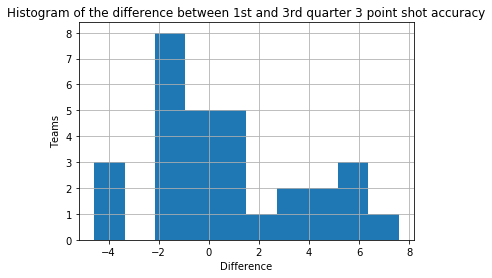

In [18]:
# histogram
df_3p_1st_and_3rd.hist("Difference_between_1st_and_3rd")
plt.title("Histogram of the difference between 1st and 3rd quarter 3 point shot accuracy")
plt.xlabel("Difference")
plt.ylabel("Teams")

In [19]:
# descriptive statistics
df_3p_1st_and_3rd['Difference_between_1st_and_3rd'].describe()

count    30.000000
mean      0.674881
std       3.145046
min      -4.581340
25%      -1.381035
50%      -0.091312
75%       2.487729
max       7.577884
Name: Difference_between_1st_and_3rd, dtype: float64

Text(0,0.5,'Команды')

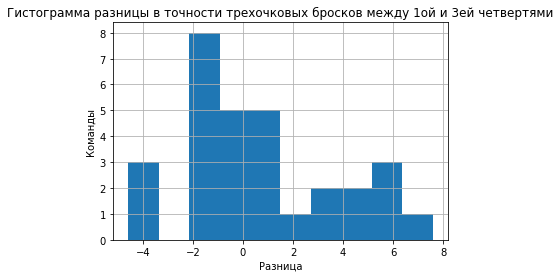

In [20]:
# in Russian
df_3p_1st_and_3rd.hist("Difference_between_1st_and_3rd")
plt.title("Гистограмма разницы в точности трехочковых бросков между 1ой и 3ей четвертями")
plt.xlabel("Разница")
plt.ylabel("Команды")

In [21]:
stats.ttest_rel(df_3p_1st_and_3rd['3p_percentage_1st'], df_3p_1st_and_3rd['3p_percentage_3rd'])


Ttest_relResult(statistic=1.1753325804178147, pvalue=0.24942155727039717)

nothing significant, but the "3 quarter warriors"

# C->C Chi-square test for independence
### in games where the lead is within 5 points at the half, does being ahead correlate with winning?

In [66]:
#each game is duplicated (counted once for both home and away team)
df_first_half_duplicated = pd.read_csv('NBA_analysis\CSV datasets\\all_games_first_half_plus_minus.csv', sep=', ', engine = 'python')
#duplicates are removed (each game is counted only once)
df_first_half = df_first_half_duplicated.drop_duplicates(subset = 'GAME_ID')

In [85]:
def check_significance_chi_lead(df):
    df['1st_half_win'] = df_first_half_close_game['PLUS_MINUS'] > 0

    print(pd.crosstab(df['1st_half_win'], df['WL'], margins=True), '\n')
    print(pd.crosstab(df['1st_half_win'], df['WL'], normalize='index', margins=True), '\n')
    p_value = stats.chi2_contingency(pd.crosstab(df['1st_half_win'], df['WL']), correction = False)[1]
    print('p-value =', p_value)
    
    if p_value >= 0.05:
        print('The association isn\'t statistically significant')
    else:
        print('The association is statistically significant')

In [54]:
# check if lead within 2 points is significant
df_first_half_close_game = df_first_half[((df_first_half['PLUS_MINUS'] >= -2) & (df_first_half['PLUS_MINUS'] <= -1)) | ((df_first_half['PLUS_MINUS'] >= 1) & (df_first_half['PLUS_MINUS'] <= 2))]

check_significance_chi_lead(df_first_half_close_game)

WL             L   W  All
1st_half_win             
False         49  49   98
True          45  50   95
All           94  99  193 

WL                   L         W
1st_half_win                    
False         0.500000  0.500000
True          0.473684  0.526316
All           0.487047  0.512953 

p-value = 0.7146119361807466
The association isn't statistically significant


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
#check if lead of exactly 2 points is significant
df_first_half_close_game = df_first_half[(df_first_half['PLUS_MINUS'] == -2) | (df_first_half['PLUS_MINUS'] == 2)]

check_significance_chi_lead(df_first_half_close_game)

WL             L   W  All
1st_half_win             
False         27  22   49
True          20  26   46
All           47  48   95 

WL                   L         W
1st_half_win                    
False         0.551020  0.448980
True          0.434783  0.565217
All           0.494737  0.505263 

p-value = 0.257447973768723
The association isn't statistically significant


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
#checking if lead within 3 points is significant
df_first_half_close_game = df_first_half[((df_first_half['PLUS_MINUS'] >= -3) & (df_first_half['PLUS_MINUS'] <= -1)) | ((df_first_half['PLUS_MINUS'] >= 1) & (df_first_half['PLUS_MINUS'] <= 3))]

check_significance_chi_lead(df_first_half_close_game)

WL              L    W  All
1st_half_win               
False          70   65  135
True           68   84  152
All           138  149  287 

WL                   L         W
1st_half_win                    
False         0.518519  0.481481
True          0.447368  0.552632
All           0.480836  0.519164 

p-value = 0.2285403307316972
The association isn't statistically significant


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
#checking if lead of exactly 3 points is significant, still not
df_first_half_close_game = df_first_half[(df_first_half['PLUS_MINUS'] == -3) | (df_first_half['PLUS_MINUS'] == 3)]

check_significance_chi_lead(df_first_half_close_game)

WL             L   W  All
1st_half_win             
False         21  16   37
True          23  34   57
All           44  50   94 

WL                   L         W
1st_half_win                    
False         0.567568  0.432432
True          0.403509  0.596491
All           0.468085  0.531915 

p-value = 0.11938386364583775
The association isn't statistically significant


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
#Check if lead within 4 points is significant
df_first_half_close_game = df_first_half[((df_first_half['PLUS_MINUS'] >= -4) & (df_first_half['PLUS_MINUS'] <= -1)) | ((df_first_half['PLUS_MINUS'] >= 1) & (df_first_half['PLUS_MINUS'] <= 4))]

check_significance_chi_lead(df_first_half_close_game)

WL              L    W  All
1st_half_win               
False          87   83  170
True           83  108  191
All           170  191  361 

WL                   L         W
1st_half_win                    
False         0.511765  0.488235
True          0.434555  0.565445
All           0.470914  0.529086 

p-value = 0.14238016058673728
The association isn't statistically significant


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
#checking if lead of exactly 4 points is significant, still not
df_first_half_close_game = df_first_half[(df_first_half['PLUS_MINUS'] == -4) | (df_first_half['PLUS_MINUS'] == 4)]

check_significance_chi_lead(df_first_half_close_game)

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


WL             L   W  All
1st_half_win             
False         17  18   35
True          15  24   39
All           32  42   74 

WL                   L         W
1st_half_win                    
False         0.485714  0.514286
True          0.384615  0.615385
All           0.432432  0.567568 

p-value = 0.38078342795092013
The association isn't statistically significant


In [61]:
#checking if lead within 5 points is significant, yes
df_first_half_close_game = df_first_half[((df_first_half['PLUS_MINUS'] >= -5) & (df_first_half['PLUS_MINUS'] <= -1)) | ((df_first_half['PLUS_MINUS'] >= 1) & (df_first_half['PLUS_MINUS'] <= 5))]

check_significance_chi_lead(df_first_half_close_game)

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


WL              L    W  All
1st_half_win               
False         121   94  215
True           94  137  231
All           215  231  446 

WL                   L         W
1st_half_win                    
False         0.562791  0.437209
True          0.406926  0.593074
All           0.482063  0.517937 

p-value = 0.0009960039387090216
The association is statistically significant


# Multiple C->Q ANOVA
### Position – age?

In [65]:
df_position_age = pd.read_csv('NBA_analysis\CSV datasets\positionage.csv', sep=', ', engine = 'python')

Text(0,0.5,'Age')

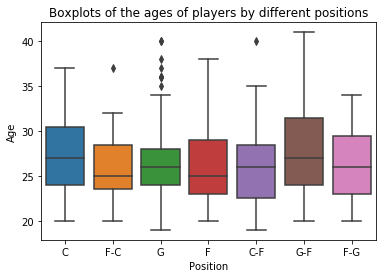

In [71]:
df_position_age_cleaned = df_position_age.drop(499)
sns.boxplot(df_position_age_cleaned['PLAYER_POSITION'], df_position_age_cleaned['AGE'])
plt.title("Boxplots of the ages of players by different positions")
plt.xlabel("Position")
plt.ylabel("Age")

Text(0,0.5,'Возраст')

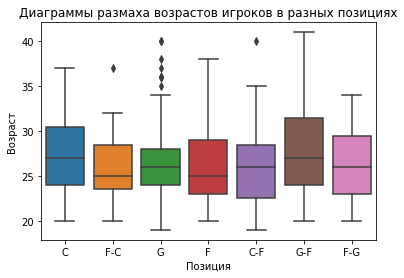

In [72]:
# In Russian
sns.boxplot(df_position_age_cleaned['PLAYER_POSITION'], df_position_age_cleaned['AGE'])
plt.title("Диаграммы размаха возрастов игроков в разных позициях")
plt.xlabel("Позиция")
plt.ylabel("Возраст")

In [73]:
df_position_age_cleaned.groupby('PLAYER_POSITION')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
PLAYER_POSITION,,,,,,,,
C,63.0,27.111111,4.399821,20.0,24.0,27.0,30.5,37.0
C-F,23.0,26.217391,5.071816,19.0,22.5,26.0,28.5,40.0
F,150.0,26.426667,4.045623,20.0,23.0,25.0,29.0,38.0
F-C,31.0,25.935484,3.881026,20.0,23.5,25.0,28.5,37.0
F-G,23.0,26.782609,4.155572,20.0,23.0,26.0,29.5,34.0
G,205.0,26.321951,4.006582,19.0,24.0,26.0,28.0,40.0
G-F,39.0,27.717949,5.155216,20.0,24.0,27.0,31.5,41.0


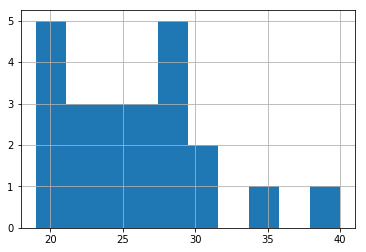

In [74]:
df_position_age_cleaned.query('PLAYER_POSITION=="C-F"')['AGE'].hist() #potential outlier


potential outlier

In [75]:
df_position_age_cleaned.query('PLAYER_POSITION=="C-F"')['AGE'].idxmax()

116

In [76]:
#running ANOVA on the full data
stats.f_oneway(df_position_age_cleaned.query('PLAYER_POSITION=="C"')['AGE'], \
    df_position_age_cleaned.query('PLAYER_POSITION=="C-F"')['AGE'], df_position_age_cleaned.query('PLAYER_POSITION=="F"')['AGE'], \
    df_position_age_cleaned.query('PLAYER_POSITION=="F-C"')['AGE'], df_position_age_cleaned.query('PLAYER_POSITION=="F-G"')['AGE'], \
    df_position_age_cleaned.query('PLAYER_POSITION=="G"')['AGE'], df_position_age_cleaned.query('PLAYER_POSITION=="G-F"')['AGE'])

F_onewayResult(statistic=0.955603760244476, pvalue=0.45477740597358385)

In [78]:
# running ANOVA on the data without the outliers in the "C-F' and 'F-C" positions - Dirk Nowitzki and Nick Collison
df_position_age_cleaned_outliers = df_position_age_cleaned.drop(116)
df_position_age_cleaned_outliers = df_position_age_cleaned_outliers.drop(df_position_age_cleaned_outliers.query('PLAYER_POSITION=="F-C"')['AGE'].idxmax())

stats.f_oneway(df_position_age_cleaned_outliers.query('PLAYER_POSITION=="C"')['AGE'], \
    df_position_age_cleaned_outliers.query('PLAYER_POSITION=="C-F"')['AGE'], df_position_age_cleaned_outliers.query('PLAYER_POSITION=="F"')['AGE'], \
    df_position_age_cleaned_outliers.query('PLAYER_POSITION=="F-C"')['AGE'], df_position_age_cleaned_outliers.query('PLAYER_POSITION=="F-G"')['AGE'], \
    df_position_age_cleaned_outliers.query('PLAYER_POSITION=="G"')['AGE'], df_position_age_cleaned_outliers.query('PLAYER_POSITION=="G-F"')['AGE'])

F_onewayResult(statistic=1.311318715208154, pvalue=0.2501211510855592)

The results are the same, so the outliers did not influence the results


# C->C Chi-square test for independence
### Usa/not usa -> position?

In [80]:
df_position_usa = pd.read_csv('NBA_analysis\CSV datasets\\positionUSA.csv', sep=', ', engine = 'python')
df_position_int = pd.read_csv('NBA_analysis\CSV datasets\\positionInt.csv', sep=', ', engine = 'python')

In [84]:
df_position_usa.head()

,CLOSE_DEF_PERSON_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,D_FGM,D_FGA,D_FG_PCT,PCT_PLUSMINUS,Origin
0,202326,DeMarcus Cousins,1610612740,NOP,C,27.0,48,48,1.0,8.00,16.69,0.479,0.000,USA
1,203076,Anthony Davis,1610612740,NOP,F-C,25.0,75,75,1.0,6.52,16.45,0.396,-0.072,USA
2,1626157,Karl-Anthony Towns,1610612750,MIN,C,22.0,82,82,1.0,7.79,15.74,0.495,0.017,USA
3,201950,Jrue Holiday,1610612740,NOP,G,28.0,80,80,1.0,6.08,14.24,0.427,-0.024,USA
4,200794,Paul Millsap,1610612743,DEN,F,33.0,37,37,1.0,6.11,14.19,0.430,-0.040,USA


In [83]:
df_position_usa['Origin'] = 'USA'
df_position_int['Origin'] = 'International'

In [82]:
# remove data entry outlier (he's not the only "pure" pg)
df_position_origin = df_position_usa.append(df_position_int)
df_position_origin_clean = df_position_origin.drop(df_position_origin.index[df_position_origin['PLAYER_POSITION'] == "PG"].tolist()[0])

In [89]:
print(pd.crosstab(df_position_origin['Origin'], df_position_origin['PLAYER_POSITION'], margins=True), '\n')
print(pd.crosstab(df_position_origin_clean['PLAYER_POSITION'], df_position_origin_clean['Origin'], normalize='index', margins=True))
#pd.crosstab(df_first_half_close_game['1st_half_win'], df_first_half_close_game['WL'], normalize='index', margins=True)

PLAYER_POSITION   C  C-F    F  F-C  F-G    G  G-F  PG  All
Origin                                                    
International    30    8   27   10    4   28    7   0  114
USA              33   15  123   21   19  177   32   1  421
All              63   23  150   31   23  205   39   1  535 

Origin           International       USA
PLAYER_POSITION                         
C                     0.476190  0.523810
C-F                   0.347826  0.652174
F                     0.180000  0.820000
F-C                   0.322581  0.677419
F-G                   0.173913  0.826087
G                     0.136585  0.863415
G-F                   0.179487  0.820513
All                   0.213483  0.786517


In [91]:
stats.chi2_contingency(pd.crosstab(df_position_origin_clean['PLAYER_POSITION'], df_position_origin_clean['Origin']), correction = False)[1]

6.340368194661366e-07

Significant

# Q->Q regression t-test for the slope
### Draft number height?

In [93]:
df_player_bios = pd.read_csv('NBA_analysis\CSV datasets\\playerbios.csv', sep=', ', engine = 'python')

df_player_bios['DRAFT_NUMBER'] = pd.to_numeric(df_player_bios['DRAFT_NUMBER'], errors='coerce')
df_player_bios['PLAYER_HEIGHT_INCHES'] = pd.to_numeric(df_player_bios['PLAYER_HEIGHT_INCHES'], errors='coerce')

df_player_bios.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,AST_PCT
0,201166,Aaron Brooks,1610612750,MIN,33.0,6-0,72,161,Oregon,USA,...,26.0,32,2.3,0.5,0.6,-16.9,0.040,0.064,0.201,0.161
1,203932,Aaron Gordon,1610612753,ORL,22.0,6-9,81,220,Arizona,USA,...,4.0,58,17.6,7.9,2.3,-2.3,0.049,0.213,0.243,0.111
2,1626151,Aaron Harrison,1610612742,DAL,23.0,6-6,78,210,Kentucky,USA,...,NaN,9,6.7,2.7,1.2,-13.4,0.017,0.106,0.151,0.072
3,1628935,Aaron Jackson,1610612745,HOU,32.0,6-3,75,183,None,USA,...,NaN,1,8.0,3.0,1.0,-15.2,0.059,0.037,0.152,0.053
4,1627846,Abdel Nader,1610612738,BOS,24.0,6-6,78,230,Iowa State,Egypt,...,58.0,48,3.0,1.5,0.5,-10.1,0.027,0.122,0.168,0.078


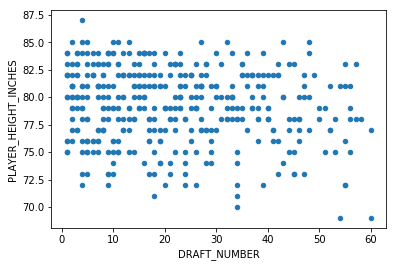

In [94]:
df_player_bios.plot.scatter('DRAFT_NUMBER', 'PLAYER_HEIGHT_INCHES')

Data not linear, so we can't run linear regression

# Q->Q  regression t-test for the slope
### Windgspan deflections?

In [100]:
df_player_wingspan = pd.read_csv('NBA_analysis\CSV datasets\\namewingspanposition.csv', sep=',')
df_player_wingspan.head()

,Player,Wingspan-in,Height-in,DWS,Pos
0,Andre Drummond,90.25,81.75,5.7,C
1,Ben Simmons,83.50,82.00,5.0,PG
2,Anthony Davis,89.50,81.25,4.9,PF
3,Robert Covington,85.75,78.25,4.5,SF
4,Russell Westbrook,79.75,74.25,4.5,PG


In [98]:
df_player_deflections = pd.read_csv('NBA_analysis\CSV datasets\\playerdeflections.csv', sep=', ', engine = 'python')
df_player_deflections.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,G,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,CHARGES_DRAWN,DEFLECTIONS,LOOSE_BALLS_RECOVERED,BOX_OUTS
0,201166,Aaron Brooks,1610612750,MIN,33.0,32,6.0,1.53,0.59,0.94,0.03,0.31,0.22,0.19
1,203932,Aaron Gordon,1610612753,ORL,22.0,58,33.0,6.47,4.69,1.78,0.07,1.41,1.21,2.72
2,1626151,Aaron Harrison,1610612742,DAL,23.0,9,26.0,6.56,3.33,3.22,0.0,2.0,0.89,0.78
3,1628935,Aaron Jackson,1610612745,HOU,32.0,1,35.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,1627846,Abdel Nader,1610612738,BOS,24.0,48,11.0,2.77,1.46,1.31,0.0,0.69,0.38,0.83


In [101]:
df_wingspan_deflections_with_nans = df_player_deflections.merge(df_player_wingspan, left_on = 'PLAYER_NAME', right_on = 'Player', how = 'left')
df_wingspan_deflections_with_nans.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,G,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,CHARGES_DRAWN,DEFLECTIONS,LOOSE_BALLS_RECOVERED,BOX_OUTS,Player,Wingspan-in,Height-in,DWS,Pos
0,201166,Aaron Brooks,1610612750,MIN,33.0,32,6.0,1.53,0.59,0.94,0.03,0.31,0.22,0.19,Aaron Brooks,76.00,70.0,0.1,PG
1,203932,Aaron Gordon,1610612753,ORL,22.0,58,33.0,6.47,4.69,1.78,0.07,1.41,1.21,2.72,Aaron Gordon,83.75,79.5,2.0,PF
2,1626151,Aaron Harrison,1610612742,DAL,23.0,9,26.0,6.56,3.33,3.22,0.0,2.0,0.89,0.78,Aaron Harrison,80.00,78.0,0.2,SG
3,1628935,Aaron Jackson,1610612745,HOU,32.0,1,35.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,Aaron Jackson,75.00,76.0,0.0,PG
4,1627846,Abdel Nader,1610612738,BOS,24.0,48,11.0,2.77,1.46,1.31,0.0,0.69,0.38,0.83,Abdel Nader,85.00,78.0,0.8,SF


In [103]:
df_wingspan_deflections_with_nans.isnull().sum()

PLAYER_ID                 0
PLAYER_NAME               0
TEAM_ID                   0
TEAM_ABBREVIATION         0
AGE                       0
G                         0
MIN                       0
CONTESTED_SHOTS           0
CONTESTED_SHOTS_2PT       0
CONTESTED_SHOTS_3PT       0
CHARGES_DRAWN             0
DEFLECTIONS               0
LOOSE_BALLS_RECOVERED     0
BOX_OUTS                  0
Player                   28
Wingspan-in              28
Height-in                28
DWS                      28
Pos                      28
dtype: int64

In [102]:
# weed out inconsistencies in data
df_wingspan_deflections_oneoff = df_wingspan_deflections_with_nans.dropna()

In [104]:
df_wingspan_deflections = df_wingspan_deflections_oneoff.query('G >= 15')

In [105]:
df_wingspan_deflections['DEFLECTIONS'] = pd.to_numeric(df_wingspan_deflections['DEFLECTIONS'], errors='coerce')

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
df_wingspan_deflections_centers = df_wingspan_deflections.query('Pos=="C"')
df_wingspan_deflections_forwards = df_wingspan_deflections[(df_wingspan_deflections['Pos'] == "PF") | (df_wingspan_deflections['Pos'] == "SF")]
df_wingspan_deflections_guards = df_wingspan_deflections[(df_wingspan_deflections['Pos'] == "PG") | (df_wingspan_deflections['Pos'] == "SG")]

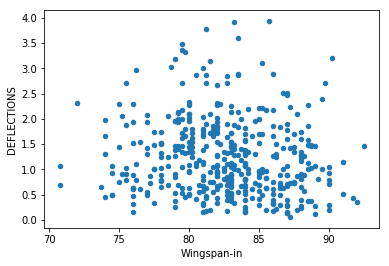

In [107]:
df_wingspan_deflections.plot.scatter('Wingspan-in', 'DEFLECTIONS')

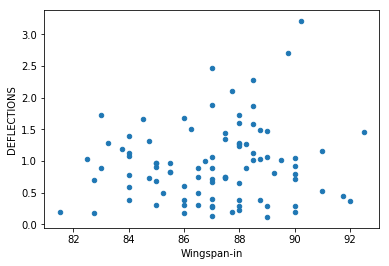

In [108]:
df_wingspan_deflections_centers.plot.scatter('Wingspan-in', 'DEFLECTIONS')

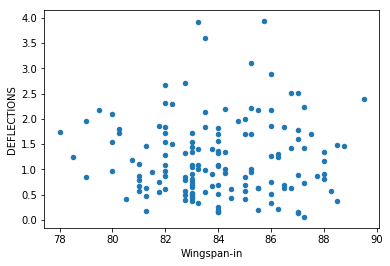

In [109]:
df_wingspan_deflections_forwards.plot.scatter('Wingspan-in', 'DEFLECTIONS')

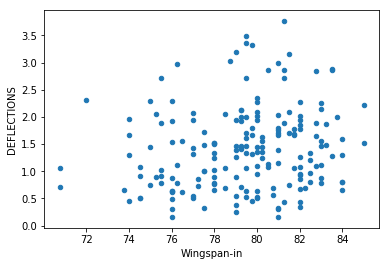

In [110]:
df_wingspan_deflections_guards.plot.scatter('Wingspan-in', 'DEFLECTIONS')

Only guards have anything similar to linear relationship

Text(0,0.5,'Результативные отклонения')

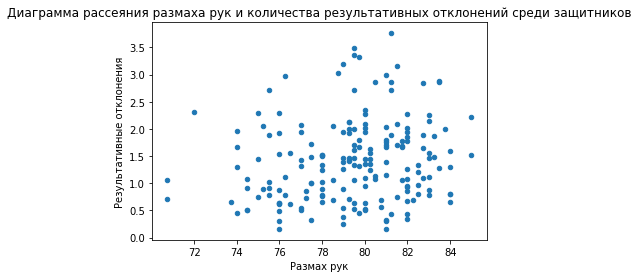

In [111]:
# In Russian
df_wingspan_deflections_guards.plot.scatter('Wingspan-in', 'DEFLECTIONS')
plt.title("Диаграмма рассеяния размаха рук и количества результативных отклонений среди защитников")
plt.xlabel("Размах рук")
plt.ylabel("Результативные отклонения")

In [112]:
stats.linregress(df_wingspan_deflections_guards['Wingspan-in'], df_wingspan_deflections_guards['DEFLECTIONS'])

LinregressResult(slope=0.044586148284437035, intercept=-2.122655924334114, rvalue=0.1685162215044324, pvalue=0.02185052959921897, stderr=0.01927866522149792)

# Q->Q  regression t-test for the slope
### Wingspan steals?

In [116]:
df_player_wingspan = pd.read_csv('NBA_analysis\CSV datasets\\namewingspanposition.csv', sep=',')
df_player_defensive = pd.read_csv('NBA_analysis\CSV datasets\\playerdefensive.csv', sep=', ', engine = 'python')

In [117]:
df_wingspan_defensive_with_nans = df_player_defensive.merge(df_player_wingspan, left_on = 'PLAYER_NAME', right_on = 'Player', how = 'left')

In [118]:
# weed out inconsistencies in data
df_wingspan_defensive_oneoff = df_wingspan_defensive_with_nans.dropna()


In [119]:
df_wingspan_defensive = df_wingspan_defensive_oneoff.query('GP > 15')

In [120]:
df_wingspan_defensive['STL'] = pd.to_numeric(df_wingspan_defensive['STL'], errors='coerce')

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_wingspan_defensive_centers = df_wingspan_defensive.query('Pos=="C"')
df_wingspan_defensive_forwards = df_wingspan_defensive[(df_wingspan_defensive['Pos'] == "PF") | (df_wingspan_defensive['Pos'] == "SF")]
df_wingspan_defensive_guards = df_wingspan_defensive[(df_wingspan_defensive['Pos'] == "PG") | (df_wingspan_defensive['Pos'] == "SG")]

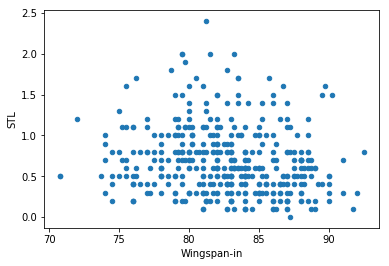

In [122]:
df_wingspan_defensive.plot.scatter('Wingspan-in', 'STL')

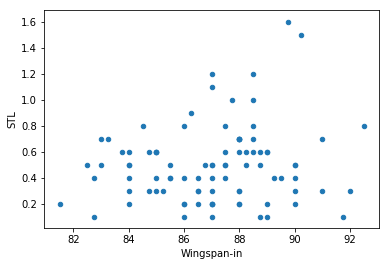

In [123]:
df_wingspan_defensive_centers.plot.scatter('Wingspan-in', 'STL')

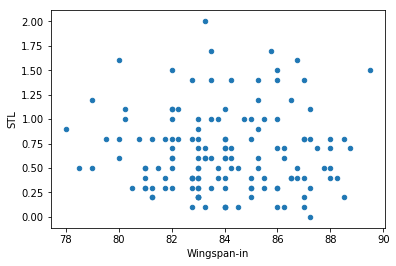

In [124]:
df_wingspan_defensive_forwards.plot.scatter('Wingspan-in', 'STL')

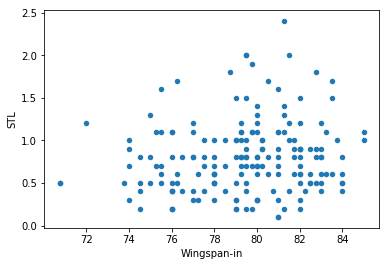

In [125]:
df_wingspan_defensive_guards.plot.scatter('Wingspan-in', 'STL')

Again, only for guards the data show any linearity

Text(0,0.5,'Перехваты')

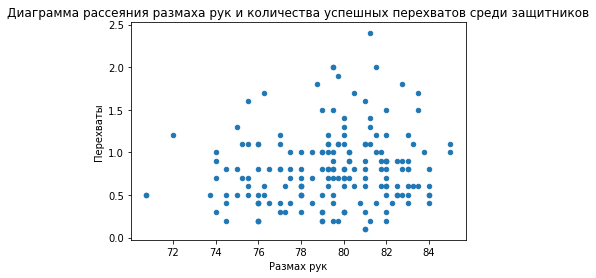

In [126]:
# In Russian
df_wingspan_defensive_guards.plot.scatter('Wingspan-in', 'STL')
plt.title("Диаграмма рассеяния размаха рук и количества успешных перехватов среди защитников")
plt.xlabel("Размах рук")
plt.ylabel("Перехваты")

In [128]:
stats.linregress(df_wingspan_defensive_guards['Wingspan-in'], df_wingspan_defensive_guards['STL'])

LinregressResult(slope=0.020907033326887838, intercept=-0.8600338179506402, rvalue=0.1412903701579556, pvalue=0.05779801365934409, stderr=0.01094900303542529)

In [130]:
stats.linregress(df_wingspan_defensive_centers['Wingspan-in'], df_wingspan_defensive_centers['STL'])

LinregressResult(slope=0.018351600012036094, intercept=-1.0936127043807073, rvalue=0.14513319922216392, pvalue=0.17230128438642828, stderr=0.013336536523138048)